In [0]:
#installing packages 
!pip3 install nltk
!pip install youtube-dl
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
!pip install youtube-dl
!youtube-dl -i PLeDb4mVO05QX-6qQ6yRZG336TNiTAHn74
!pip install webvtt-py



     |████████████████████████████████| 1.8MB 3.5MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[youtube:playlist] PLeDb4mVO05QX-6qQ6yRZG336TNiTAHn74: Downloading webpage
[download] Downloading playlist: Práctica de Pronunciación del español
[youtube:playlist] playlist Práctica de Pronunciación del español: Downloading 35 videos
[download] Downloading video 1 of 35
[youtube] vRODsqqY500: Downloading webpage
[youtube] vRODsqqY500: Downloading video info webpage
[download] Destination: Práctica de pronunciación del español. Fonema, alófono y articuladores.-vRODsqqY500.f137.mp4
[download] 100% of 91.41MiB in 00:06
[download] Destination: Práctica de pronunciación del español. Fonema, alófono y articuladores.-vRODsqqY500.f251.webm
[download] 100% of 6.16MiB in 00:00
[ffmpeg] Merging formats into "Práctica de pronunciación del español. Fonema, alófono y articuladores.-vRODsqqY500.mkv"
Deleting original file Práctica de pronunc

In [0]:
!rm -r "/content/subs"
!rm -r "/content/videos"
!mkdir "/content/subs"
!mkdir "/content/videos"



rm: cannot remove '/content/subs': No such file or directory
rm: cannot remove '/content/videos': No such file or directory


In [0]:
import glob
import nltk
import webvtt
import os
from nltk.tokenize import word_tokenize
import shutil



In [0]:
for filename in glob.glob("/content/*.mkv"):
  shutil.copy(filename,"/content/videos")
  os.remove(filename)
  
for filename in glob.glob("/content/*.mp4"):
  shutil.copy(filename,"/content/videos")
  os.remove(filename) 
  
!unzip "/content/subs.zip"  


for filename in glob.glob("/content/*.vtt"):
  shutil.copy(filename,"/content/subs")
  os.remove(filename) 
  

Archive:  /content/subs.zip
  inflating: Práctica de pronunciación del español. Fonema _ɾ-ioYVzicq_kY.es.vtt  
  inflating: Práctica de pronunciación del español. Fonema _ʝ-zP84KDECeu0.es.vtt  
  inflating: Práctica de pronunciación del español. Repaso de _f_, _s_, _θ_, _x_, _ʝ_, _w-4V3E-Ir_JCQ.es.vtt  
  inflating: Práctica de pronunciación del español. Fonema _ɲ-lRP1sM9-tug.es.vtt  
  inflating: Práctica de pronunciación del español. Acento ortográfico-6jcO49nS2-k.es.vtt  
  inflating: Práctica de pronunciación del español. Fonema _g-tpp5wLlnQH0.es.vtt  
  inflating: Práctica de pronunciación del español. Fonema _p--zwCzZxrGQ8.es.vtt  
  inflating: Práctica de pronunciación del español. Fonema _m-Md0t_UYfLZw.es.vtt  
  inflating: Práctica de pronunciación del español. Fonema _n-7KVtPMNosTU.es.vtt  
  inflating: Práctica de pronunciación del español. Fonema _k-4VAUBFzaCrI.es.vtt  
  inflating: Práctica de pronunciación del español. Fonema _s-pmMmN1EZ5rk.es.vtt  
  inflating: Práctica 

In [0]:
import cv2
import matplotlib.pyplot as plt
def print_pa(sub_path,mseconds,word,sila):
  video_path=sub_path.split(".es.vtt")[0]
  video_path=video_path.split("/")[-1]
  video_path="/content/videos/"+video_path+"."
  if(os.path.exists(video_path+"mp4")):
    #print("File mp4 exists")
    video_path+="mp4"
  elif(os.path.exists(video_path+"mkv")):
    #print("File mkv exists")
    video_path+="mkv"  
  else:
    print("File error")
    return False
  if(os.path.exists("/content/drive/My Drive/tempo/dataset/"+word+"/")):
    return False
  
  cam=cv2.VideoCapture(video_path)
  plt.figure(figsize=(20,20))
  for j,msecond in enumerate(mseconds):
    cam.set(cv2.CAP_PROP_POS_AVI_RATIO,0)
    cam.set(cv2.CAP_PROP_POS_MSEC,msecond)      # just cue to 20 sec. position
    success,image = cam.read()
    if success:
      
      plt.subplot(5, 5, j+1).set_title('Subplot n°{}' .format(j+1))
      plt.imshow(image)
      plt.axis('off')
      
    else:
      return False
  #ss=input("algo")  
  plt.show()
  dat=input("Word ("+word+") : ")
  if(len(dat)>1):
    word=dat
    
    os.mkdir("/content/drive/My Drive/tempo/dataset/"+word+"/") 
    for j, msecond in enumerate(mseconds):
        
      cam.set(cv2.CAP_PROP_POS_AVI_RATIO,0)
      cam.set(cv2.CAP_PROP_POS_MSEC,msecond)      # just cue to 20 sec. position
      success,image = cam.read()
      if success:
          
        pat="/content/drive/My Drive/tempo/dataset/"+word+"/"+str(j)+".jpg"
          
        cv2.imwrite(pat,image)
  if(dat=="y"):
    os.mkdir("/content/drive/My Drive/tempo/dataset/"+word+"/") 
    for j, msecond in enumerate(mseconds):
        
      cam.set(cv2.CAP_PROP_POS_AVI_RATIO,0)
      cam.set(cv2.CAP_PROP_POS_MSEC,msecond)      # just cue to 20 sec. position
      success,image = cam.read()
      if success:
          
        pat="/content/drive/My Drive/tempo/dataset/"+word+"/"+str(j)+".jpg"
          
        cv2.imwrite(pat,image)
  if(dat.isnumeric()):
    sar=int(dat)
    os.mkdir("/content/drive/My Drive/tempo/dataset/"+word+"/") 
    for j, msecond in enumerate(mseconds):
      if(j>=sar):  
        cam.set(cv2.CAP_PROP_POS_AVI_RATIO,0)
        cam.set(cv2.CAP_PROP_POS_MSEC,msecond)      # just cue to 20 sec. position
        success,image = cam.read()
        if success:
          
          pat="/content/drive/My Drive/tempo/dataset/"+word+"/"+str(j)+".jpg"
          
          cv2.imwrite(pat,image)      
  if dat=="n":
    return False
    print("No se guardara")
   
  return True
  
  

      
  

  
#print_pa("/content/subs/Práctica de pronunciación del español. Fonema _ʝ-zP84KDECeu0.es.vtt",[10000.0,20000])  

In [0]:
class char():
    def __init__(self):
        pass
    
class char_line():
    def __init__(self, word):
        self.word = word
        self.char_line = [(char, self.char_type(char)) for char in word]
        self.type_line = ''.join(chartype for char, chartype in self.char_line)
        
    def char_type(self, char):
        if char in set(['a', 'á', 'e', 'é','o', 'ó', 'í', 'ú']):
            return 'V' #strong vowel
        if char in set(['i', 'u']):
            return 'v' #week vowel
        if char=='x':
            return 'x'
        if char=='s':
            return 's'
        else:
            return 'c'
            
    def find(self, finder):
        return self.type_line.find(finder)
        
    def split(self, pos, where):
        return char_line(self.word[0:pos+where]), char_line(self.word[pos+where:])
    
    def split_by(self, finder, where):
        split_point = self.find(finder)
        if split_point!=-1:
            chl1, chl2 = self.split(split_point, where)
            return chl1, chl2
        return self, False
     
    def __str__(self):
        return '<'+self.word+':'+self.type_line+'>'
    
    def __repr__(self):
        return '<'+repr(self.word)+':'+self.type_line+'>'

class silabizer():
    def __init__(self):
        self.grammar = []
        
    def split(self, chars):
        rules  = [('VV',1), ('cccc',2), ('xcc',1), ('ccx',2), ('csc',2), ('xc',1), ('cc',1), ('vcc',2), ('Vcc',2), ('sc',1), ('cs',1),('Vc',1), ('vc',1), ('Vs',1), ('vs',1), ('vxv',1), ('VxV',1), ('vxV',1), ('Vxv',1)]
        for split_rule, where in rules:
            first, second = chars.split_by(split_rule,where)
            if second:
                if first.type_line in set(['c','s','x','cs']) or second.type_line in set(['c','s','x','cs']):
                    #print 'skip1', first.word, second.word, split_rule, chars.type_line
                    continue
                if first.type_line[-1]=='c' and second.word[0] in set(['l','r']):
                    continue
                if first.word[-1]=='l' and second.word[-1]=='l':
                    continue
                if first.word[-1]=='r' and second.word[-1]=='r':
                    continue
                if first.word[-1]=='c' and second.word[-1]=='h':
                    continue
                return self.split(first)+self.split(second)
        return [chars]
        
    def __call__(self, word):
        return self.split(char_line(word))

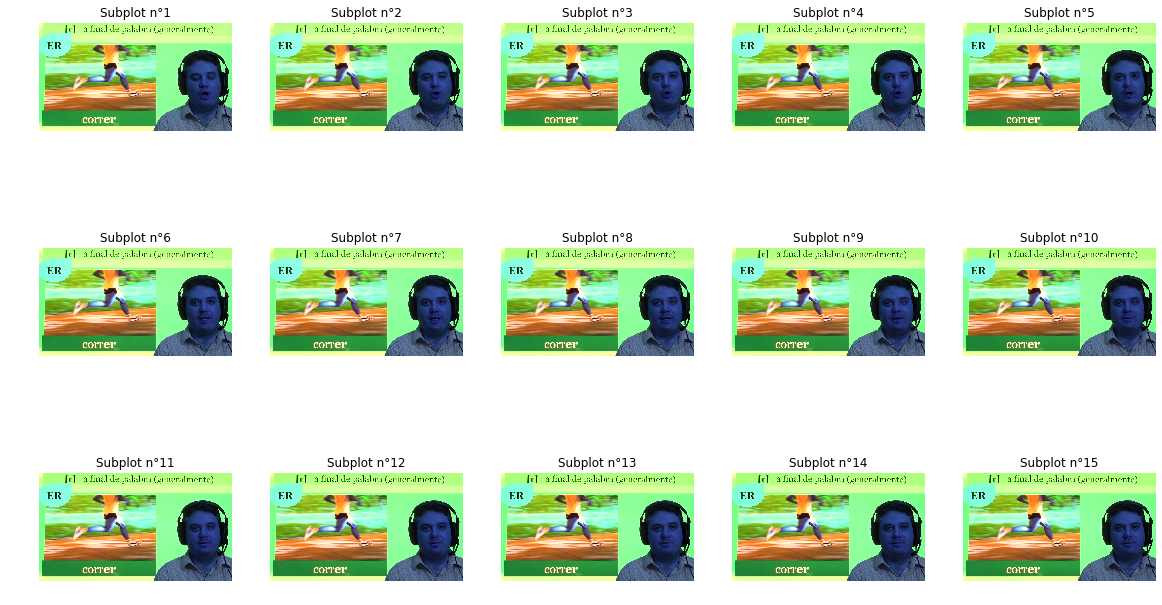

Word (salvar) : correr


FileExistsError: ignored

In [0]:
i=0

#!rm -r "/content/dataset"
#!mkdir "/content/dataset"
from IPython.display import clear_output
import time
s=silabizer()
wordst=[]
for filename in glob.glob("/content/subs/*.vtt"):
  #print(filename)
  for caption in webvtt.read(filename):
    line=caption.text
    words = word_tokenize(line)
    if(len(words)==2):
      words=[words[1]]
    if(len(words)==1):
      clear_output()
      if(not (words[0] in wordst)):
        
        
        start=(float(caption.start.split(":")[-1])+float(caption.start.split(":")[-2])*60)
        end=(float(caption.end.split(":")[-1])+float(caption.end.split(":")[-2])*60 )
        duration=end-start
        dpw=duration/len(s(words[0]))
        if(duration>0.5 and dpw<2):
          mseconds=[]  
          for k in range(15):
            timer=1000*(start+((k-1)/14)*5*dpw/4)
            mseconds.append(timer)
            #print("Silaba "+str(k+1)+" "+str(timer))
          print_pa(filename,mseconds,words[0],s(words[0]))  
          
          #print(">>"+str(i)+"@"+words[0]+" "+str(start)+" to "+str(end)+" duration: "+str(duration))
          i+=1
          #time.sleep(3)
          #print(caption.start+" "+caption.end)
          #print(dpw)
          wordst.append(words[0])
          #last word was correr, but is called salvar by the program
        
print(wordst)        

In [0]:
#vuelco was the last word
!mkdir "/content/drive/My Drive/tempo"
!cp -a "/content/dataset" "/content/drive/My Drive/tempo"

In [0]:
!zip -r "output_file.zip" "/content/dataset"

In [0]:
!rm -r "/content/dataset/leyendo"

In [0]:


data = "Hola  "
words = word_tokenize(data)


print(words)